In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse.linalg import spsolve



def gauss_jacobi_sparse(A, b, x0, tol, maxit):
    n = A.shape[0]
    x = x0.copy()
    hist_res = []
    hist_rel = []
    D = A.diagonal()
    
    if np.any(np.abs(D) < 1e-15): D = D + 1e-20 
        
    R = A.copy()
    R.setdiag(0)
    
    for k in range(maxit):
        res = b - A.dot(x)
        norm_res = np.linalg.norm(res, np.inf)
        
        if k > 0:
            norm_rel = np.linalg.norm(x - x_old, np.inf) / (np.linalg.norm(x, np.inf) + 1e-15)
        else:
            norm_rel = 1.0
            
        hist_res.append(norm_res)
        hist_rel.append(norm_rel)
        
        if norm_res < tol and norm_rel < tol:
            break
            
        x_old = x.copy()
        Rx = R.dot(x)
        x = (b - Rx) / D
        
    return x, hist_res, hist_rel

def gauss_seidel_sparse(A, b, x0, tol, maxit):
    x = x0.copy()
    hist_res = []
    hist_rel = []
    Lower = sparse.tril(A, format='csr') 
    Upper = sparse.triu(A, k=1, format='csr')
    
    for k in range(maxit):
        res = b - A.dot(x)
        norm_res = np.linalg.norm(res, np.inf)
        if k > 0:
            norm_rel = np.linalg.norm(x - x_old, np.inf) / (np.linalg.norm(x, np.inf) + 1e-15)
        else:
            norm_rel = 1.0
        hist_res.append(norm_res)
        hist_rel.append(norm_rel)
        if norm_res < tol and norm_rel < tol: break
        x_old = x.copy()
        rhs = b - Upper.dot(x)
        x = spsolve(Lower, rhs)
        
    return x, hist_res, hist_rel


def print_table(method, res, rel):
    print(f"\n--- {method} ---")
    print(f"{'k':<5} | {'Resíduo':<15} | {'Erro Rel.':<15}")
    print("-" * 42)
    indices = range(len(res))
    if len(indices) > 15:
        indices = list(range(10)) + list(range(len(indices)-5, len(indices)))
    for k in indices:
        if k == 10 and len(res) > 15: print("...")
        print(f"{k+1:<5} | {res[k]:<15.2e} | {rel[k]:<15.2e}")
    print(f"Total: {len(res)} iterações")

def plot_graphs(res_j, rel_j, res_s, rel_s, title):
    """Gera e MOSTRA o gráfico imediatamente"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    
    if res_j: ax1.semilogy(res_j, 'o-', label='Jacobi', markersize=3, alpha=0.7)
    if res_s: ax1.semilogy(res_s, 'x-', label='Seidel', markersize=3, alpha=0.7)
    ax1.set_title(f'Resíduo - {title}')
    ax1.set_xlabel('Iterações'); ax1.set_ylabel('log(Norma Resíduo)'); ax1.legend(); ax1.grid(True, which="both", ls="--", alpha=0.4)
    
    if rel_j: ax2.semilogy(rel_j, 'o-', label='Jacobi', markersize=3, alpha=0.7)
    if rel_s: ax2.semilogy(rel_s, 'x-', label='Seidel', markersize=3, alpha=0.7)
    ax2.set_title(f'Erro Relativo - {title}')
    ax2.set_xlabel('Iterações'); ax2.set_ylabel('log(Erro Relativo)'); ax2.legend(); ax2.grid(True, which="both", ls="--", alpha=0.4)
    
    plt.tight_layout()
    plt.show() 

 EXERCÍCIO I 

>>> CASO A: alpha=4, beta=1

--- Jacobi (a=4) ---
k     | Resíduo         | Erro Rel.      
------------------------------------------
1     | 3.00e+00        | 1.00e+00       
2     | 1.25e+00        | 1.00e+00       
3     | 5.62e-01        | 3.57e-01       
4     | 2.66e-01        | 1.48e-01       
5     | 1.29e-01        | 6.80e-02       
6     | 6.35e-02        | 3.25e-02       
7     | 3.15e-02        | 1.59e-02       
8     | 1.57e-02        | 7.89e-03       
9     | 7.86e-03        | 3.94e-03       
10    | 3.92e-03        | 1.97e-03       
25    | 1.12e-07        | 5.67e-08       
26    | 5.58e-08        | 2.80e-08       
27    | 2.76e-08        | 1.40e-08       
28    | 1.37e-08        | 6.90e-09       
29    | 6.78e-09        | 3.43e-09       
Total: 29 iterações

--- Seidel (a=4) ---
k     | Resíduo         | Erro Rel.      
------------------------------------------
1     | 3.00e+00        | 1.00e+00       
2     | 9.17e-01        | 1.00e+00       
3     | 2

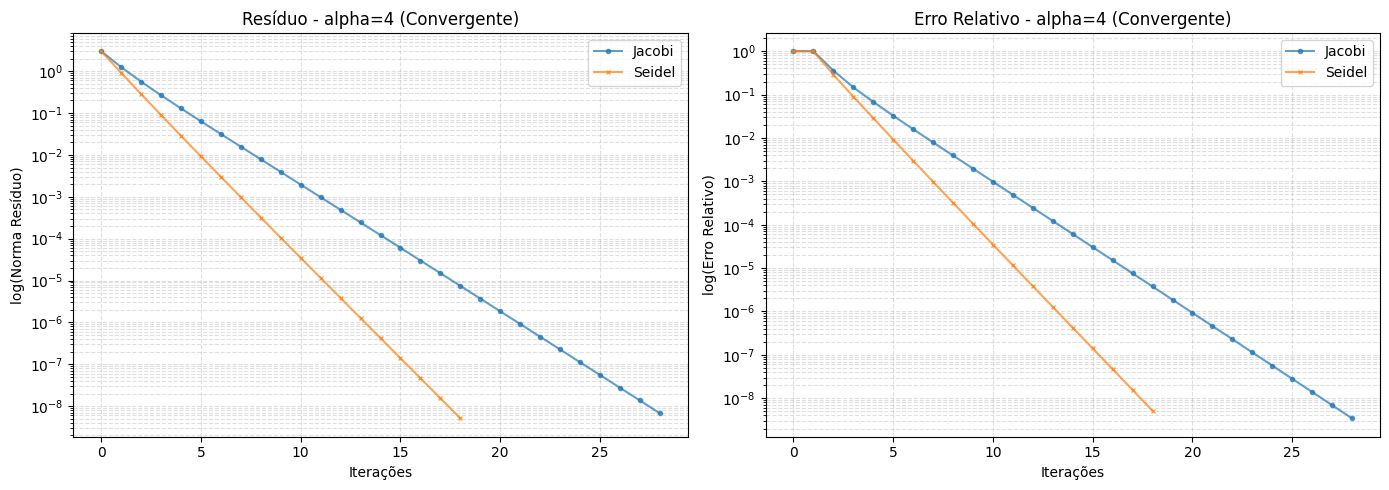


>>> CASO B: alpha=1, beta=1

--- Jacobi (a=1) ---
k     | Resíduo         | Erro Rel.      
------------------------------------------
1     | 1.00e+00        | 1.00e+00       
2     | 2.00e+00        | 1.00e+00       
3     | 4.00e+00        | 6.67e-01       
4     | 8.00e+00        | 5.71e-01       
5     | 1.60e+01        | 5.33e-01       
6     | 3.20e+01        | 5.16e-01       
7     | 6.40e+01        | 5.08e-01       
8     | 1.28e+02        | 5.04e-01       
9     | 2.56e+02        | 5.02e-01       
10    | 5.11e+02        | 5.01e-01       
96    | 1.69e+28        | 4.94e-01       
97    | 3.34e+28        | 4.94e-01       
98    | 6.60e+28        | 4.94e-01       
99    | 1.31e+29        | 4.94e-01       
100   | 2.58e+29        | 4.94e-01       
Total: 100 iterações


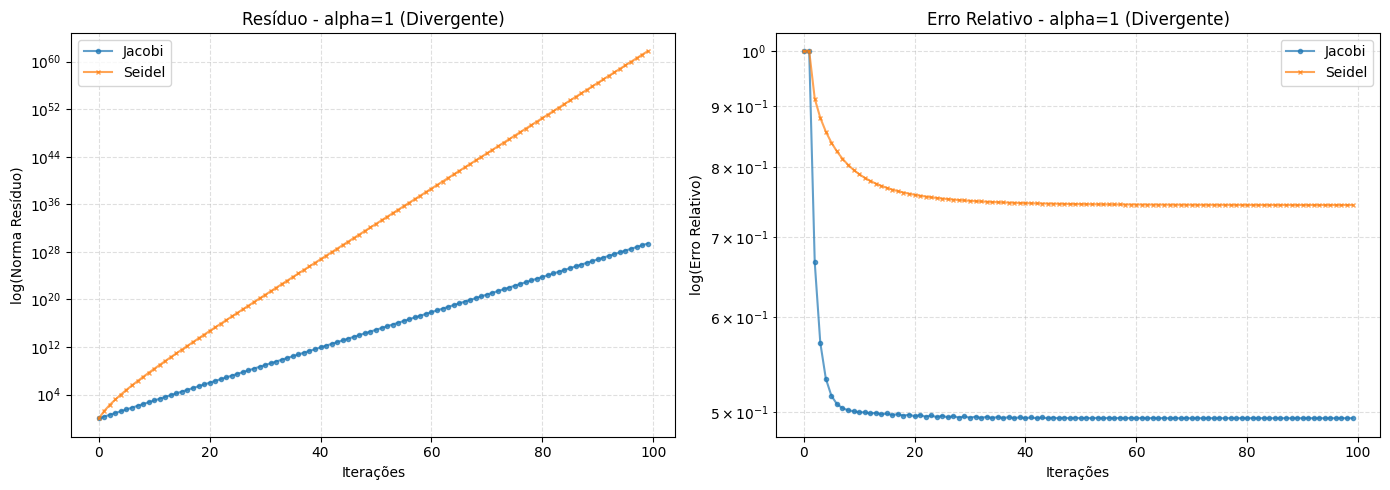

In [ ]:


def run_ex1():
    print("="*40 + "\n EXERCÍCIO I \n" + "="*40)
    n = 20; x0 = np.zeros(n); tol = 1e-8; maxit = 2000

    def get_sys(alpha, beta):
        A = sparse.lil_matrix((n, n))
        b = np.zeros(n)
        for i in range(n):
            A[i, i] = alpha
            if i > 0: A[i, i-1] = -beta
            if i < n-1: A[i, i+1] = -beta
            if i==0 or i==n-1: b[i] = alpha - beta
            else: b[i] = alpha - 2*beta
        return A.tocsr(), b

    print("\n>>> CASO A: alpha=4, beta=1")
    A1, b1 = get_sys(4, 1)
    xj1, resj1, relj1 = gauss_jacobi_sparse(A1, b1, x0, tol, maxit)
    xs1, ress1, rels1 = gauss_seidel_sparse(A1, b1, x0, tol, maxit)
    
    print_table("Jacobi (a=4)", resj1, relj1)
    print_table("Seidel (a=4)", ress1, rels1)
    plot_graphs(resj1, relj1, ress1, rels1, "alpha=4 (Convergente)")

    print("\n>>> CASO B: alpha=1, beta=1")
    A2, b2 = get_sys(1, 1)
    xj2, resj2, relj2 = gauss_jacobi_sparse(A2, b2, x0, tol, 100)
    xs2, ress2, rels2 = gauss_seidel_sparse(A2, b2, x0, tol, 100)
    
    print_table("Jacobi (a=1)", resj2, relj2)
    plot_graphs(resj2, relj2, ress2, rels2, "alpha=1 (Divergente)")

run_ex1()